<a href="https://colab.research.google.com/github/joachinhimself/My-projects-/blob/main/ANN_on_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/sample_data/Iris.csv')

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


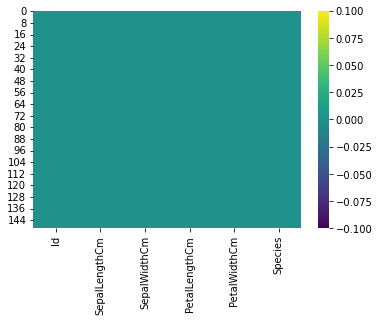

In [8]:
missing_values = df.isnull()
missing_values
sns.heatmap(data = missing_values, cmap='viridis')

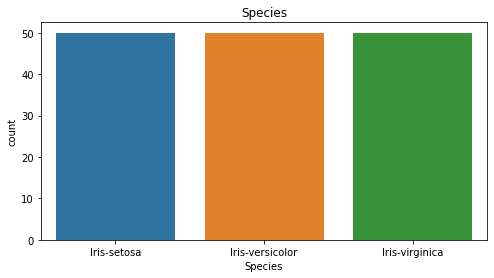

In [9]:
df['Species']
plt.figure(figsize = (8,4))
plt.title('Species')
sns.countplot(x = 'Species', data = df)

In [10]:
X = df.iloc[:, 1:5]
X.columns.values

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
      dtype=object)

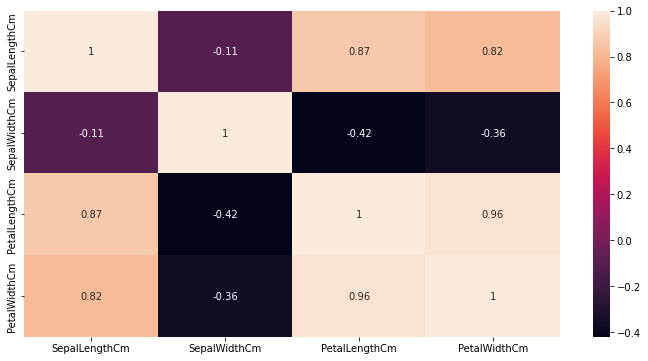

In [11]:
plt.subplots(figsize=(12,6))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix,annot=True)

In [12]:
y = df['Species']
y 

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
len(X_train)

120

In [16]:
len(y_train)

120

Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
x_feature = X_train
y_target = y_train

In [19]:
dtreemodel.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
dtreemodel.feature_importances_

array([0.03334028, 0.        , 0.38926487, 0.57739485])

In [21]:
predictions = dtreemodel.predict(X_test)

In [22]:
dtreemodel.score(X_test, y_test) 

1.0

In [23]:
parameters = {'max_depth' : list(range(1, 6))}
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(dtreemodel,param_grid = parameters,cv=10)
search.fit(X_train, y_train)
print(search.best_score_)
print(search.best_params_)

0.9416666666666667
{'max_depth': 3}


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtreemodel = DecisionTreeClassifier(max_depth=3)
dtreemodel.fit(X_train, y_train)
predictions = dtreemodel.predict(X_test)
print(f"{accuracy_score(y_test, predictions) * 100}")

100.0


*Random forest*

In [25]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=500)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [26]:
y_pred2 = model2.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
r2 = accuracy_score(y_test, y_pred2)
print('Accuracy is: ', r2*100)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Accuracy is:  100.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_r = confusion_matrix(y_test, y_pred2)
print(cm_r)
accuracy_score(y_test, y_pred2)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

ANN

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [30]:
y = df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [33]:
classifier = Sequential()
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'swish'))
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

In [34]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [35]:
y_train.shape

(120,)

In [36]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 1.0988 - accuracy: 0.3250
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0986 - accuracy: 0.3333
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0985 - accuracy: 0.3667
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0983 - accuracy: 0.3750
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0981 - accuracy: 0.3417
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0975 - accuracy: 0.3417
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0967 - accuracy: 0.3417
Epoch 11/

In [37]:
y_pred_ann = classifier.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred_ann.argmax(axis=1)))
print(classification_report(y_test, y_pred_ann.argmax(axis=1)))

[[10  0  0]
 [ 0  5  4]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_ann = confusion_matrix(y_test, y_pred_ann.argmax(axis=1))
print(cm_ann)
accuracy_score(y_test, y_pred_ann.argmax(axis=1))

[[10  0  0]
 [ 0  5  4]
 [ 0  0 11]]


0.8666666666666667